## Analysis 1 : Adj_Close and its moving average

In [49]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime


In [50]:
# Read downloaded data
p = Path(os.getcwd())
path = str(p.parent) + '/data/AAPL/AAPL.csv'
df = pd.read_csv(path)
#df.tail()

In [51]:
# select data from 2016-2017
df = df[df.apply(lambda x: int(x['Date'].split('-')[0]) >= 2016, axis=1)]
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

#df.head()

In [52]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,329.00000,329.000000,329.000000,329.000000,3.290000e+02,329.000000,329.0,329.000000,329.000000,329.000000,329.000000,3.290000e+02
mean,111.29386,112.186469,110.550467,111.437675,3.546626e+07,0.008511,1.0,110.139895,111.021832,109.406333,110.282824,3.546626e+07
std,14.70205,14.635344,14.824287,14.763443,1.698838e+07,0.068658,0.0,15.329024,15.267247,15.448658,15.392214,1.698838e+07
min,90.00000,91.670000,89.470000,90.340000,0.000000e+00,0.000000,1.0,88.674156,90.319554,88.151964,89.009147,0.000000e+00
25%,98.70000,99.870000,98.110000,98.830000,2.513956e+07,0.000000,1.0,97.216433,98.075940,96.112933,97.324813,2.513956e+07
50%,108.77000,109.690000,108.110000,108.850000,3.083700e+07,0.000000,1.0,107.446799,108.210639,106.744152,107.534935,3.083700e+07
75%,116.86000,117.760000,116.470000,117.060000,4.035138e+07,0.000000,1.0,116.223936,116.876905,115.701963,116.259562,4.035138e+07
max,144.29000,145.460000,143.810000,144.770000,1.333697e+08,0.570000,1.0,144.290000,145.460000,143.810000,144.770000,1.333697e+08


In [53]:
# calaulate Adj_Close_Change
change = df.Adj_Close.diff()
df['Adj_Close_Change'] = change
#df.head()

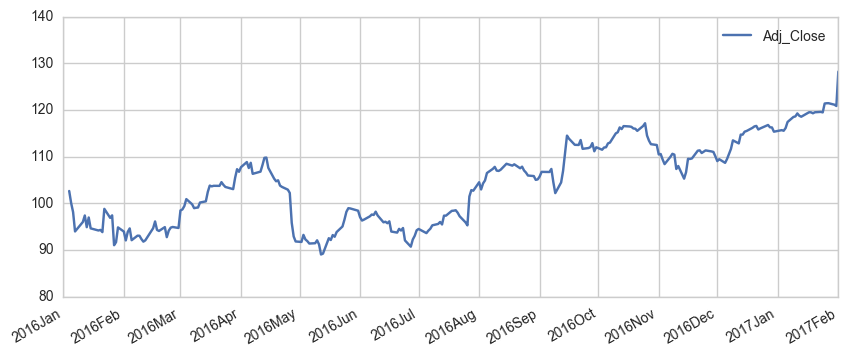

In [54]:
months = mdate.MonthLocator()
yearsFmt = mdate.DateFormatter('%Y%b')

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)

ax.plot(df['Date'], df['Adj_Close'])

datemin = datetime(2016, 1, 1)
datemax = datetime(2017, 2, 1)
ax.set_xlim(datemin, datemax)
ax.format_xdata = mdate.DateFormatter('%Y-%M-%d')
fig.autofmt_xdate()
fig.set_size_inches(10,4)
ax.legend()
ax.set_ylim(80,140)
plt.savefig('ana_1_output/Adj_Close.png')

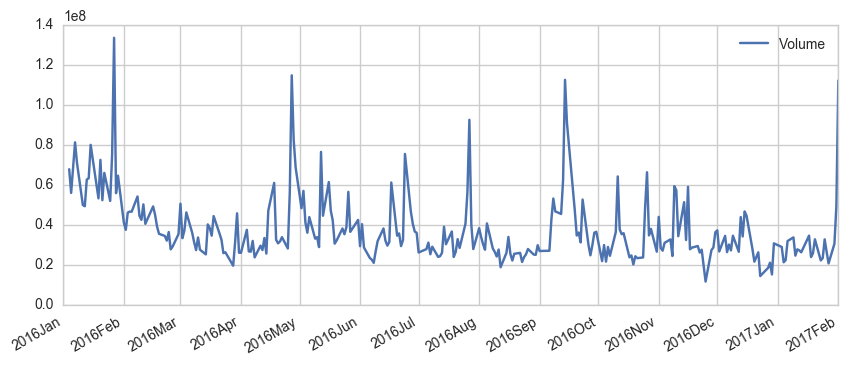

In [55]:
months = mdate.MonthLocator()
yearsFmt = mdate.DateFormatter('%Y%b')

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)

ax.plot(df['Date'], df['Volume'])

datemin = datetime(2016, 1, 1)
datemax = datetime(2017, 2, 1)
ax.set_xlim(datemin, datemax)
ax.format_xdata = mdate.DateFormatter('%Y-%M-%d')
fig.autofmt_xdate()
fig.set_size_inches(10,4)
ax.legend()
plt.savefig('ana_1_output/Volume.png')


In [56]:
# moving average
moving_average_day = [10,20,50]

for ma in moving_average_day:
    column_name = "MA for %s days" %(str(ma))
    df[column_name]=Series.rolling(df['Adj_Close'],ma).mean()
#df.head()

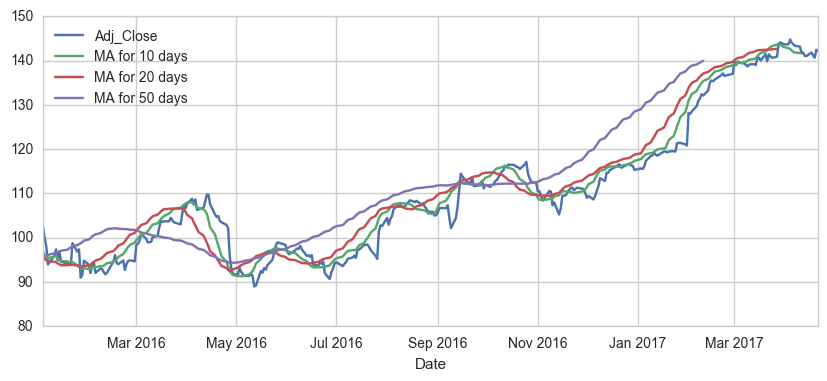

In [57]:
df = df.set_index('Date')
df[['Adj_Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
plt.savefig('ana_1_output/moving_average.png')